In [246]:
import os
import gzip
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_validate

In [2]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [3]:
def load_FashionMNIST(data_path):
    Xtrn, Ytrn = load_mnist(data_path, "train")
    Xtst, Ytst = load_mnist(data_path, "t10k")
    return Xtrn.astype(np.float), Ytrn, Xtst.astype(np.float), Ytst

def load_CoVoST2(data_path):
    data = np.load(data_path+'/speech_trn.npz', allow_pickle=True)
    Xtrn, Ytrn = data['Xtrn'], data['Ytrn']
    data = np.load(data_path+'/speech_tst.npz', allow_pickle=True)
    Xtst, Ytst = data['Xtst'], data['Ytst']
    return Xtrn, Ytrn, Xtst, Ytst

In [4]:
datapath = os.path.join(os.getcwd())
datapath

'/Users/Hoffmann/Downloads/iaml-cw2'

In [5]:
Xtrn, Ytrn, Xtst, Ytst = load_FashionMNIST(datapath)

In [6]:
from copy import deepcopy

In [7]:
Xtrn_orig = deepcopy(Xtrn)
Xtst_orig = deepcopy(Xtst)

In [8]:
Xtrn = Xtrn/255.0
Xtst = Xtst/255.0

In [9]:
np.array_equal(Xtrn_orig, Xtrn*255.0)

True

In [10]:
Xmean_trn = np.mean(Xtrn, axis=0)

In [11]:
Xmean_tst = np.mean(Xtst, axis=0)

In [12]:
Xtst_nm = Xtst - Xmean_tst

In [13]:
Xtrn_nm = Xtrn - Xmean_trn

In [14]:
Xtrn_nm.shape

(60000, 784)

In [15]:
model_lr = LogisticRegression().fit(Xtrn_nm, Ytrn)

In [16]:
y_pred_lr = model_lr.predict(Xtst_nm)

In [17]:
len(y_pred_lr[y_pred_lr==9])

995

In [18]:
accuracy_score(Ytst, y_pred_lr)

0.8398

In [19]:
confusion_matrix(Ytst, y_pred_lr)

array([[819,   4,  15,  50,   7,   4,  88,   1,  12,   0],
       [  5, 953,   4,  27,   5,   0,   3,   1,   2,   0],
       [ 27,   4, 731,  11, 133,   0,  82,   2,   9,   1],
       [ 29,  17,  14, 866,  33,   0,  37,   0,   4,   0],
       [  1,   4, 115,  39, 759,   2,  71,   0,   9,   0],
       [  2,   0,   0,   1,   0, 912,   0,  56,   9,  20],
       [149,   3, 126,  47, 108,   1, 537,   0,  28,   1],
       [  0,   0,   0,   0,   0,  32,   0, 936,   1,  31],
       [  7,   1,   6,  11,   3,   7,  15,   5, 944,   1],
       [  0,   0,   0,   1,   0,  15,   1,  42,   0, 941]])

In [20]:
model_svc = SVC(kernel='rbf', C=1.0, gamma='auto').fit(Xtrn_nm, Ytrn)

In [21]:
y_pred_svc = model_svc.predict(Xtst_nm)

In [22]:
model_svc.score(Xtst_nm, Ytst)

0.8462

In [23]:
confusion_matrix(Ytst, y_pred_svc)

array([[845,   2,   8,  51,   4,   4,  72,   0,  14,   0],
       [  4, 951,   7,  31,   5,   0,   1,   0,   1,   0],
       [ 16,   2, 751,  11, 136,   0,  76,   0,   8,   0],
       [ 32,   6,  12, 883,  26,   0,  38,   0,   3,   0],
       [  1,   0,  98,  38, 773,   0,  86,   0,   4,   0],
       [  0,   0,   0,   1,   0, 911,   0,  60,   2,  26],
       [185,   1, 122,  39,  95,   0, 533,   0,  25,   0],
       [  0,   0,   0,   0,   0,  34,   0, 926,   0,  40],
       [  3,   1,   8,   5,   2,   4,  13,   4, 959,   1],
       [  0,   0,   0,   0,   0,  22,   0,  47,   1, 930]])

In [24]:
# get the eigenvectors

In [175]:
pca = PCA().fit(Xtrn_nm)

In [176]:
V = pca.components_

In [177]:
z_p = Xtrn_nm.dot(V.T)
z_p.shape

(60000, 784)

In [178]:
for i in range(60000):
    z_p[i][2:] = np.zeros((1,782))

In [179]:
z_p.shape

(60000, 784)

In [180]:
# filter points that lie in (-5sigma1, 5sigma2) to (5sigma1, -5sigma2)

In [181]:
[sigma1, sigma2] = np.sqrt(pca.explained_variance_)[:2]

In [182]:
xs = np.linspace(-5*sigma1, 5*sigma1, num=100)

In [183]:
ys = np.linspace(-5*sigma2, 5*sigma2, num=100)

In [184]:
xx, yy = np.meshgrid(xs, ys)

In [185]:
len(np.c_[xx.ravel(), yy.ravel()])

10000

In [186]:
z_xy = np.c_[xx.ravel(), yy.ravel()]

In [187]:
z_xy[0]

array([-22.25410393, -17.40130057])

In [188]:
z_orig = np.zeros((len(xx)*len(xx), 784))

In [189]:
for i in range(len(xx)*len(xx)):
    z_orig[i][:2] = z_xy[i]
    z_orig[i][2:] = np.zeros((1,782))

In [190]:
# transform to original basis

In [191]:
z_xy_orig = z_orig.dot(V)

In [192]:
Z = model_lr.predict(z_xy_orig)

In [229]:
len(Z[Z==9])

0

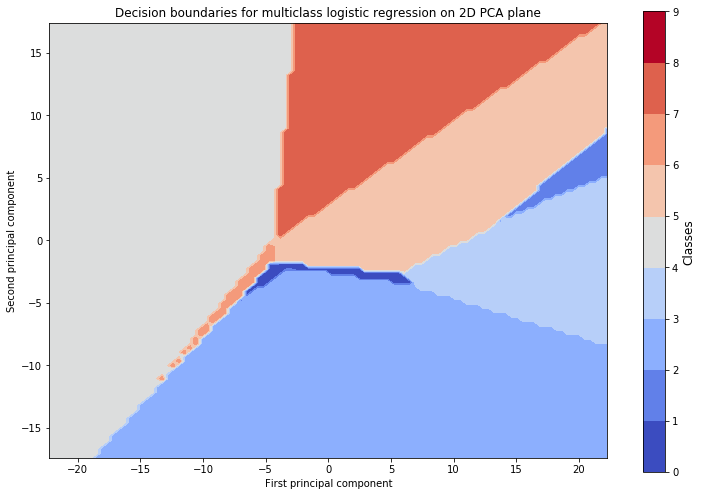

In [292]:
# Put the result into a color plot
fig, ax = plt.subplots(figsize=(10,8))
cmap = plt.cm.coolwarm
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)
bounds = np.arange(0,10)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Decision boundaries for multiclass logistic regression on 2D PCA plane')
cs = ax.contourf(xx, yy, Z.reshape(xx.shape), cmap=cmap, norm=norm)
ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm,
    spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')
ax2.set_ylabel('Classes', size=12)
plt.savefig('lr_2d_plane.png')
plt.show()

In [195]:
Z_svm = model_svc.predict(z_xy_orig)

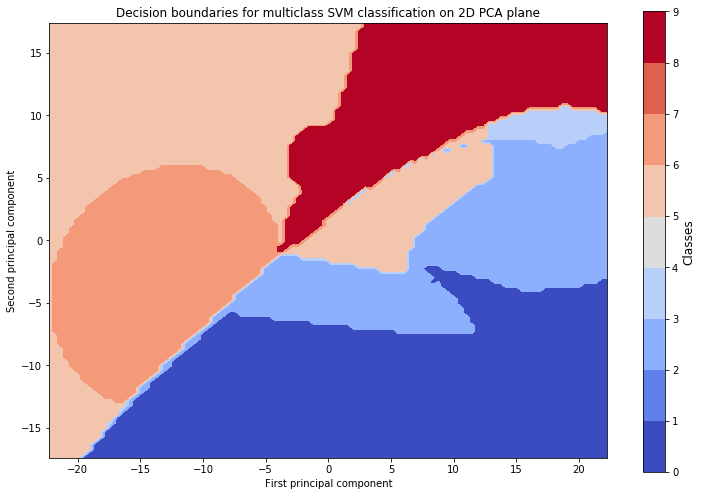

In [291]:
import matplotlib as mpl
fig, ax = plt.subplots(figsize=(10,8))
cmap = plt.cm.coolwarm
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)
bounds = np.arange(0,10)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Decision boundaries for multiclass SVM classification on 2D PCA plane')
cs = ax.contourf(xx, yy, Z_svm.reshape(xx.shape), cmap=cmap, norm=norm)
ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm,
    spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')
ax2.set_ylabel('Classes', size=12)
plt.savefig('svc_2d_plane.png')
plt.show()

In [235]:
Xsmall = np.zeros((10000, 784))
Ysmall = np.zeros((10000,), dtype=int)

In [236]:
# allocate 1000 samples per class
for i in range(10):
    Xsmall[i*1000:(i+1)*1000, :] = (Xtrn_nm[Ytrn == i])[:1000, :]
    Ysmall[i*1000:(i+1)*1000] = i

In [245]:
C_range = np.logspace(-2, 3, num=10)
C_range

array([1.00000000e-02, 3.59381366e-02, 1.29154967e-01, 4.64158883e-01,
       1.66810054e+00, 5.99484250e+00, 2.15443469e+01, 7.74263683e+01,
       2.78255940e+02, 1.00000000e+03])

In [247]:
mean_cv_scores = np.zeros((10,))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [252]:
for i in range(10):
    model_ = SVC(kernel='rbf', C=C_range[i], gamma='auto')
    cv_results = cross_validate(model_, Xsmall, Ysmall, cv=3, scoring='accuracy')
    mean_cv_scores[i] = np.mean(cv_results['test_score'])

In [249]:
cv_results.keys()

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])

In [258]:
np.max(mean_cv_scores)

0.8565023106939273

In [288]:
C_range[np.argmax(mean_cv_scores)]

21.544346900318846

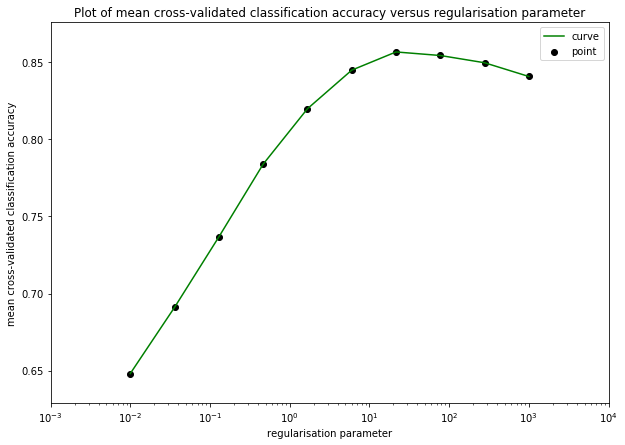

In [282]:
fig, axs = plt.subplots(figsize=(10,7))
plt.scatter(C_range, mean_cv_scores, color='black', label='point')
plt.plot(C_range, mean_cv_scores, color='green', label='curve')
axs.set_xscale('log')
axs.set_xbound(lower=10**(-3), upper=10**4)
plt.xlabel('regularisation parameter')
plt.ylabel('mean cross-validated classification accuracy')
plt.title('Plot of mean cross-validated classification accuracy versus regularisation parameter')
plt.legend(loc='best')
plt.savefig('svc_cv_plot.png')
plt.show()

In [293]:
c_max = 21.544346900318846

In [294]:
svc_max = SVC(kernel='rbf', C=c_max, gamma='auto').fit(Xtrn_nm, Ytrn)

In [296]:
y_pred_tr_svc_max = svc_max.predict(Xtrn_nm)
y_pred_tst_svc_max = svc_max.predict(Xtst_nm)

In [297]:
accuracy_score(Ytrn, y_pred_tr_svc_max)

0.9084166666666667

In [298]:
accuracy_score(Ytst, y_pred_tst_svc_max)

0.877